### IMPORT LIBRARIES

In [1]:
#ignore warning
import warnings
warnings.filterwarnings('ignore')

#Import to Data Cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#Modelling
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### IMPORT DATASET

In [2]:
#define function to displaying all row in data

def display_all(df):
    with pd.option_context('display.max_rows', None):
        with pd.option_context('display.max_columns', None):
            display_all(df)

In [3]:
train = pd.read_csv('./Dataset/house-prices-advanced-regression-techniques/train.csv',
                   index_col="Id")
test = pd.read_csv('./Dataset/house-prices-advanced-regression-techniques/test.csv',
                  index_col="Id")
sample_submission = pd.read_csv('./Dataset/house-prices-advanced-regression-techniques/sample_submission.csv')

In [4]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### EXPLORATORY DATA ANALYSIS

#### COLUMN DETAILS

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


##### SALE PRICE DISTRIBUTION

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


[Text(0.5, 0, 'SalePrice'),
 Text(0.5, 1.0, 'Distribution Plot of SalePrice Column')]

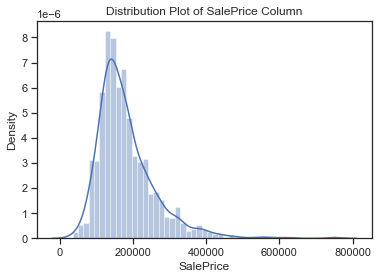

In [5]:
#describe saleprice column
print(train['SalePrice'].describe())

#plotting distribution of saleprice column
sns.set(style="ticks", color_codes=True)
ax = sns.distplot(train["SalePrice"])
ax.set(xlabel = 'SalePrice', 
       title = 'Distribution Plot of SalePrice Column')

Based on the distribution graph above, it can be seen that the saleprice value is skewed to the right which I guessed because there are some very high salesprice values (assuming above 400000), so that later these high values (outliers) will be removed to get a normal distribution of the independent variables for the model. machine learning.

[Text(0.5, 0, 'Land Surface Condition'),
 Text(0.5, 1.0, 'Log Normal Distribution')]

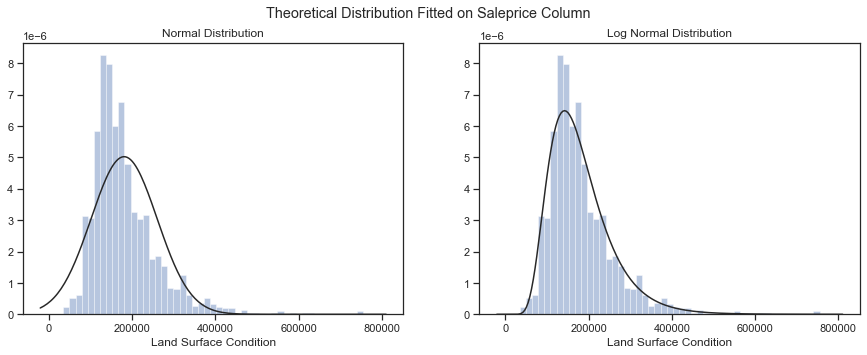

In [6]:
#fit saleprice column distribution with several theoretical distribution

#plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Theoretical Distribution Fitted on Saleprice Column')

#normal
sns.distplot(train["SalePrice"],
                   ax = ax1,
                   kde = False,
                   fit = st.norm)
ax1.set(xlabel='Land Surface Condition', 
        title='Normal Distribution')

#lognormal
sns.distplot(train["SalePrice"],
                   ax = ax2,
                   kde = False,
                   fit = st.lognorm)
ax2.set(xlabel='Land Surface Condition', 
        title='Log Normal Distribution')

Based on the comparison of the two graphs above, it can be seen that the normal log distribution is more suitable for the data so that a log transformation will be carried out to the data for the machine learning model.

##### CORRELATION

In [7]:
#define numerical and object column

#numerical (without saleprice)
num_feat = test.dtypes[test.dtypes != "object"].index

#object
obj_feat = train.dtypes[train.dtypes == "object"].index

print("Numerical Features :", len(num_feat))
print(num_feat)
print("Object Features :", len(obj_feat))
print(obj_feat)

Numerical Features : 36
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
Object Features : 43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinT

There are 37 numeric columns (SalePrice not included because SalePrice is a target column) and 43 object columns in the attached dataset.

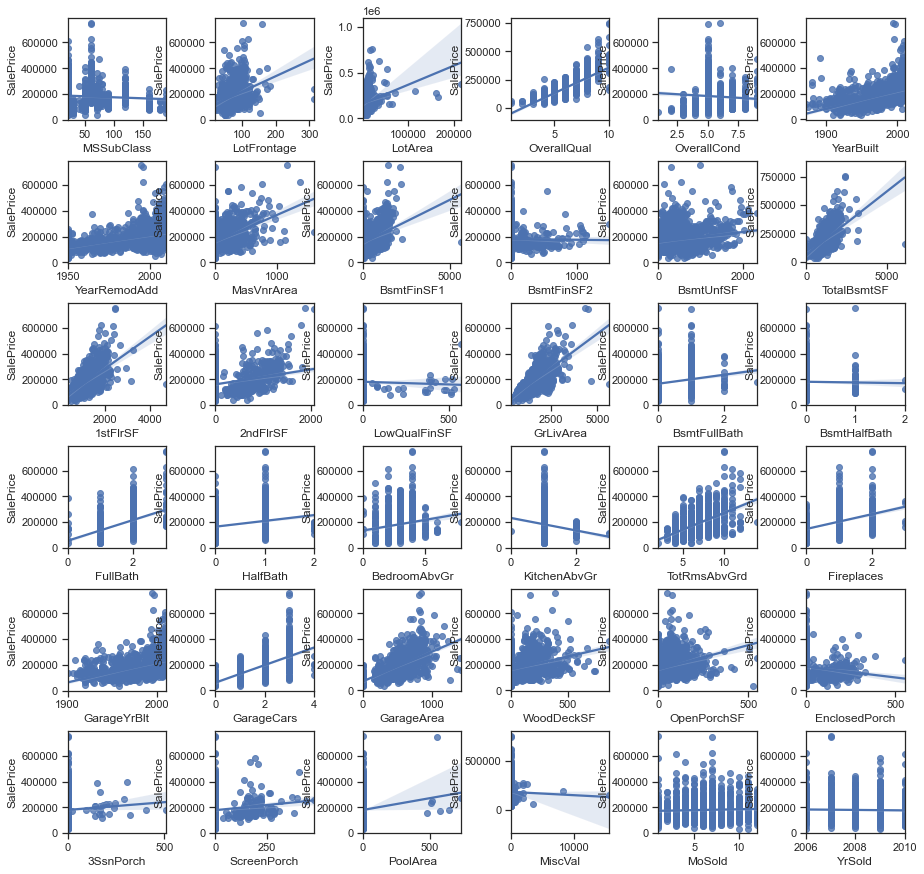

In [8]:
#correlation SalePrice to numerical column
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.5)

for i in range(len(num_feat)):
    ax = fig.add_subplot(6, 6, i+1)
    sns.regplot(train[num_feat[i]], train["SalePrice"],ax=ax)
plt.show()

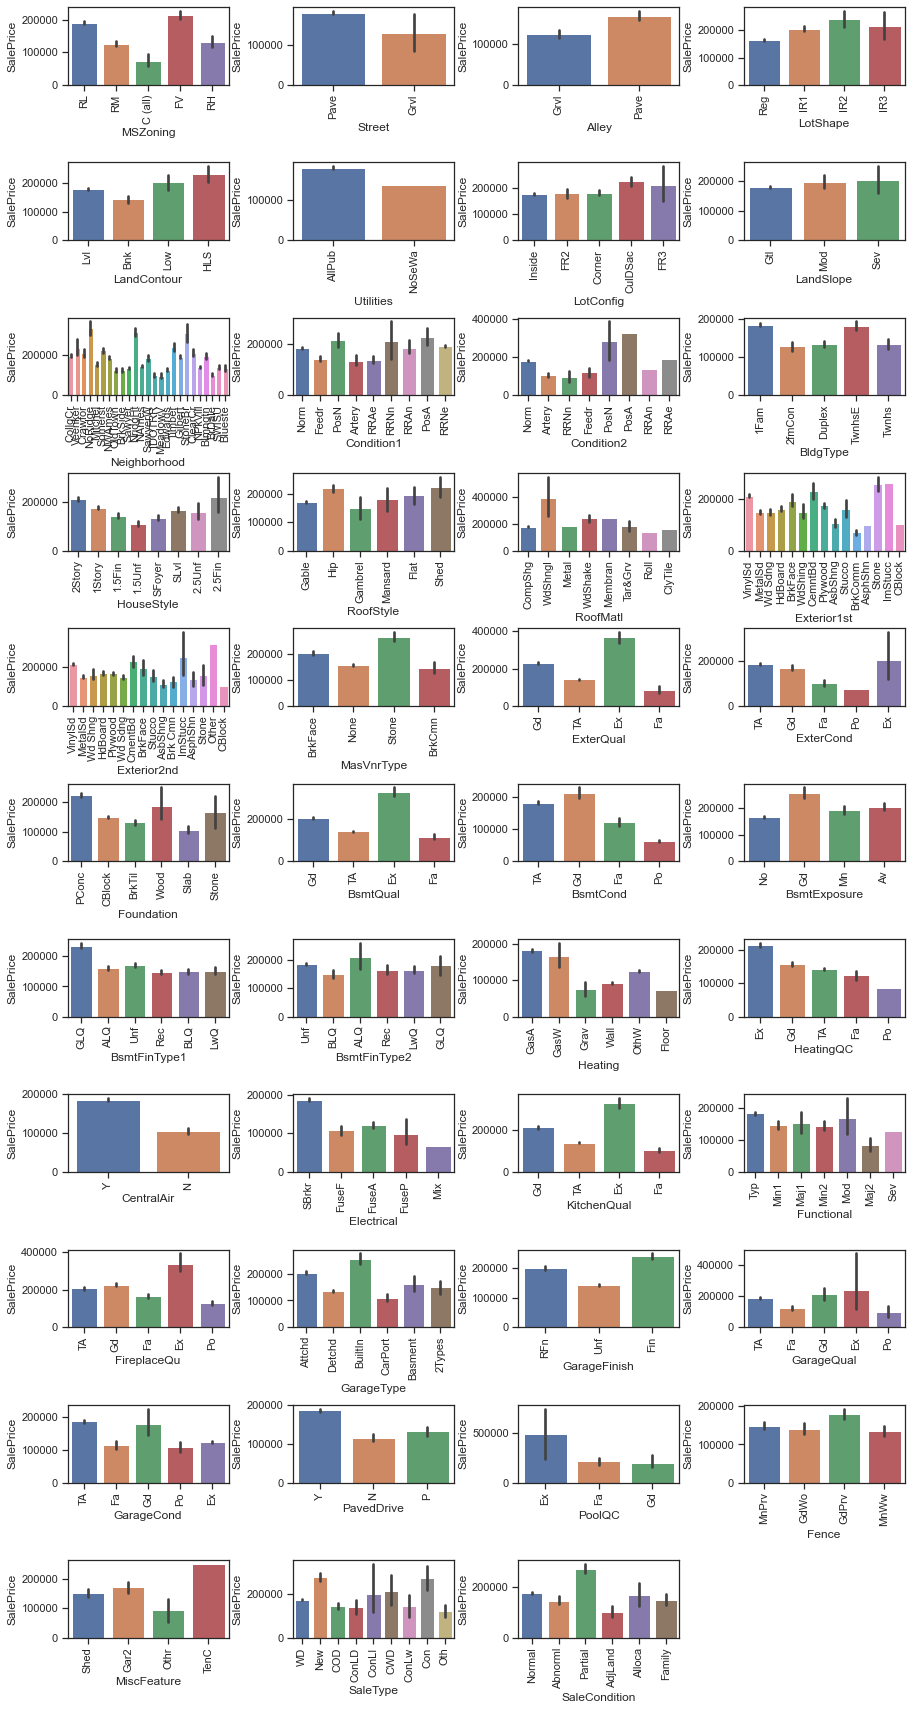

In [9]:
#correlation SalePrice to categorical column
fig = plt.figure(figsize=(15, 30))
fig.subplots_adjust(hspace=1, wspace=0.4)

for i in range(len(obj_feat)):
    if i < 43 :
        ax = fig.add_subplot(11, 4, i+1)
        sns.barplot(train[obj_feat[i]], train["SalePrice"],ax=ax)
        plt.xticks(rotation = 90)
    else :
        break
plt.show()

Based on the two regplot and barplot charts above, we can see how much influence a feature has on the target (SalePrice)

In [10]:
corr = train.corr()
corr = corr.sort_values(["SalePrice"], ascending = False)
corr.SalePrice

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

<AxesSubplot:>

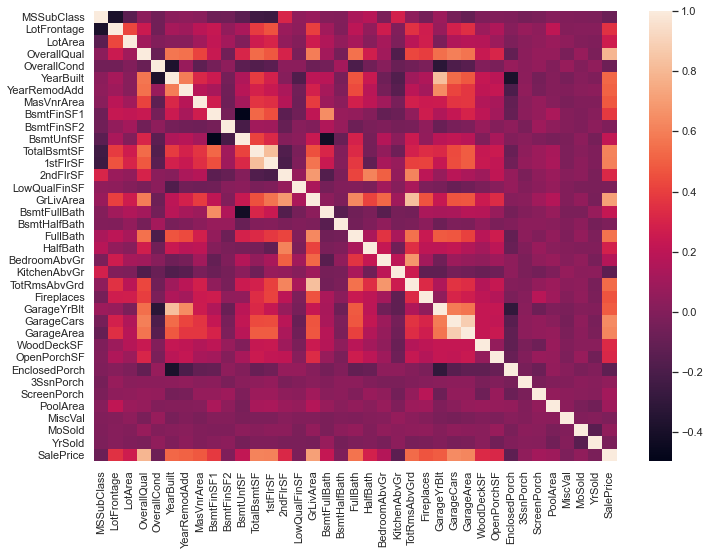

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(train.corr())

Each feature has a correlation to the target (SalePrice), some have a negative correlation and some are positive. The highest correlation level is in the **OverallQual** column and the lowest correlation level is in the **BsmtFinSF2** column

### DATA CLEANING

In [12]:
#define function to check missing value
def get_missing_value(df):
    mis_val = df.isnull().sum()
    tot_val = df.shape[0]
    mis_percentage = round((100 * mis_val / tot_val),
                           2)
    miss_tab = pd.concat([mis_val, mis_percentage], 
                         axis=1)
    miss_tab_col_name = miss_tab.rename(columns = {0 : 'Row With Missing Value', 
                                                   1 : 'Percentage (%)'})
    miss_tab_col_name = miss_tab_col_name.sort_values('Percentage (%)',ascending=False)
    return miss_tab_col_name[miss_tab_col_name["Row With Missing Value"] > 0]

#### CLEANING TRAIN DATA

In [13]:
get_missing_value(train)

,Row With Missing Value,Percentage (%)
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


First Plan :
As we can see from the table above, that there are columns that have very many missing values. In this case I assume that the column with missing values of more than 10 percent of the total will be deleted.

After analyzing each column :
Each column has a specific purpose and we can fill the empty space in each column without having to delete the column. Upon closer inspection, some of the columns have NaN values which means a house doesn't have that feature. The numerical column has a NaN value, which means a house does not have this feature and we can fill it with a value of 0.

Therefore we will dissect one by one from the available columns in the dataset.

##### GarageYrblt

Oldest Garage :  1900.0
Newest Garage :  2010.0


Text(0.5, 0, 'GarageYrBlt (Year)')

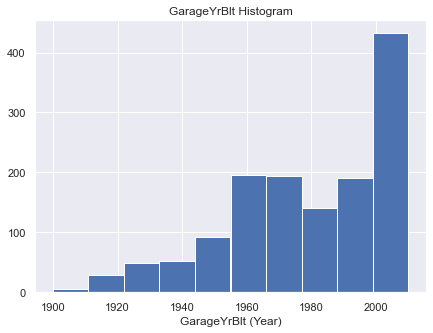

In [14]:
#min and max
print("Oldest Garage : ", train["GarageYrBlt"].min())
print("Newest Garage : ", train["GarageYrBlt"].max())

#plotting histogram
plt.figure(figsize=(7, 5))
train["GarageYrBlt"].hist()
plt.title("GarageYrBlt Histogram")
plt.xlabel("GarageYrBlt (Year)")

In [15]:
#change GarageYrblt column to categorical column
def garageyearbuild_wrangler(row):
    if row['GarageYrBlt'] >= 1900 and row['GarageYrBlt'] < 1910:
        return '1900s'
    elif row['GarageYrBlt'] >= 1910 and row['GarageYrBlt'] < 1920:
        return '1910s'
    elif row['GarageYrBlt'] >= 1920 and row['GarageYrBlt'] < 1930:
        return '1920s'
    elif row['GarageYrBlt'] >= 1930 and row['GarageYrBlt'] < 1940:
        return '1930s'
    elif row['GarageYrBlt'] >= 1940 and row['GarageYrBlt'] < 1950:
        return '1940s'
    elif row['GarageYrBlt'] >= 1950 and row['GarageYrBlt'] < 1960:
        return '1950s'
    elif row['GarageYrBlt'] >= 1960 and row['GarageYrBlt'] < 1970:
        return '1960s'
    elif row['GarageYrBlt'] >= 1970 and row['GarageYrBlt'] < 1980:
        return '1970s'
    elif row['GarageYrBlt'] >= 1980 and row['GarageYrBlt'] < 1990:
        return '1980s'
    elif row['GarageYrBlt'] >= 1990 and row['GarageYrBlt'] < 2000:
        return '1990s'
    elif row['GarageYrBlt'] >= 2000 and row['GarageYrBlt'] <= 2010:
        return '2000s'
    else:
        return 'None'
    
train['GarageYrBlt'] = train.apply(lambda row: garageyearbuild_wrangler(row), axis=1)

##### Missing values that will be replaced with the value "None" because the house does not have that feature.

In [16]:
#define columns
none_columns = ["PoolQC", "MiscFeature", "Alley", "Fence",
               "FireplaceQu", "BsmtFinType2", "BsmtExposure",
               "BsmtQual", "BsmtCond", "BsmtFinType1", "MasVnrType"]

#filling missing values
for col in none_columns:
    train[col] = train[col].fillna("None")

##### Garage Category Columns

In [17]:
garage_cat_columns = ["GarageCond", "GarageType", "GarageQual", 
                      "GarageFinish"]

#filling missing values
for col in garage_cat_columns:
    train[col] = train[col].fillna("None")

##### MasVnrArea

In [18]:
masvnr = train[train["MasVnrArea"] == 0]
masvnr[["MasVnrArea", "MasVnrType"]]

,MasVnrArea,MasVnrType
Id,,
2,0.0,None
4,0.0,None
6,0.0,None
9,0.0,None
10,0.0,None
...,...,...
1455,0.0,None
1456,0.0,None
1458,0.0,None


In [19]:
masvnrisnull = train[train['MasVnrArea'].isnull()]
masvnrisnull[["MasVnrArea", "MasVnrType"]]

,MasVnrArea,MasVnrType
Id,,
235,NaN,None
530,NaN,None
651,NaN,None
937,NaN,None
974,NaN,None
978,NaN,None
1244,NaN,None
1279,NaN,None


Based on the two tables above, it can be seen that all MaxVnr of type None have area 0 and all missing values in MasVnrArea have type of None. Therefore we can fill in the missing value in the MaxVnrArea column with a value of 0.

In [20]:
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)

#### Replace with Mean or Mode

In [21]:
#electrical column
train["Electrical"].mode()

0    SBrkr
dtype: object

In [22]:
#lotfrontage column
train["LotFrontage"].mean()

70.04995836802665

In [23]:
train["LotFrontage"] = train["LotFrontage"].fillna(train["LotFrontage"].mean())
train["Electrical"] = train["Electrical"].fillna("SBrkr")

In [24]:
train.isna().values.any()

False

#### CLEANING TEST DATA

In [25]:
get_missing_value(test)

,Row With Missing Value,Percentage (%)
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageYrBlt,78,5.35
GarageFinish,78,5.35
GarageQual,78,5.35
GarageCond,78,5.35


##### REPLACE WITH "None"

In [26]:
#define columns
none_columns = ["PoolQC", "MiscFeature", "Alley", "Fence",
               "FireplaceQu", "BsmtFinType2", "BsmtExposure",
               "BsmtQual", "BsmtCond", "BsmtFinType1"]

#filling missing values
for col in none_columns:
    test[col] = test[col].fillna("None")

##### MS COLUMNS

In [27]:
mszon_na = test[test["MasVnrType"].isnull()]
mszon_na[["MSZoning", "MasVnrArea","MasVnrType"]]

,MSZoning,MasVnrArea,MasVnrType
Id,,,
1692,RL,NaN,NaN
1707,FV,NaN,NaN
1883,RL,NaN,NaN
1993,RL,NaN,NaN
2005,RL,NaN,NaN
2042,FV,NaN,NaN
2312,RL,NaN,NaN
2326,RL,NaN,NaN
2341,RL,NaN,NaN


In [28]:
mszon_na = test[test["MSZoning"].isnull()]
mszon_na[["MSZoning", "MasVnrArea","MasVnrType"]]

,MSZoning,MasVnrArea,MasVnrType
Id,,,
1916,NaN,0.0,None
2217,NaN,0.0,None
2251,NaN,0.0,None
2905,NaN,0.0,None


In [29]:
mszon_na = test[test["MasVnrArea"].isnull()]
mszon_na[["MSZoning", "MasVnrArea","MasVnrType"]]

,MSZoning,MasVnrArea,MasVnrType
Id,,,
1692,RL,NaN,NaN
1707,FV,NaN,NaN
1883,RL,NaN,NaN
1993,RL,NaN,NaN
2005,RL,NaN,NaN
2042,FV,NaN,NaN
2312,RL,NaN,NaN
2326,RL,NaN,NaN
2341,RL,NaN,NaN


In [30]:
mszon_na = test[test["MasVnrArea"] == 0]
mszon_na[["MSZoning", "MasVnrArea","MasVnrType"]]

,MSZoning,MasVnrArea,MasVnrType
Id,,,
1461,RH,0.0,None
1463,RL,0.0,None
1465,RL,0.0,None
1466,RL,0.0,None
1467,RL,0.0,None
...,...,...,...
2914,RM,0.0,None
2915,RM,0.0,None
2916,RM,0.0,None


MSZoning

In [31]:
mszon_na = train[train["MasVnrArea"] == 0]
mszon_na1 = mszon_na[mszon_na["MasVnrType"] == "None"]
mszon_na1["MSZoning"].mode()

0    RL
dtype: object

In [32]:
test["MSZoning"] = test["MSZoning"].fillna("RL")

MasVnrType and MasVnrArea (assumption)

In [33]:
test["MasVnrType"] = test["MasVnrType"].fillna("None")
test["MasVnrArea"] = test["MasVnrArea"].fillna("0")

##### GARAGE

In [34]:
#change GarageYrblt column to categorical column
def garageyearbuild_wrangler(row):
    if row['GarageYrBlt'] >= 1900 and row['GarageYrBlt'] < 1910:
        return '1900s'
    elif row['GarageYrBlt'] >= 1910 and row['GarageYrBlt'] < 1920:
        return '1910s'
    elif row['GarageYrBlt'] >= 1920 and row['GarageYrBlt'] < 1930:
        return '1920s'
    elif row['GarageYrBlt'] >= 1930 and row['GarageYrBlt'] < 1940:
        return '1930s'
    elif row['GarageYrBlt'] >= 1940 and row['GarageYrBlt'] < 1950:
        return '1940s'
    elif row['GarageYrBlt'] >= 1950 and row['GarageYrBlt'] < 1960:
        return '1950s'
    elif row['GarageYrBlt'] >= 1960 and row['GarageYrBlt'] < 1970:
        return '1960s'
    elif row['GarageYrBlt'] >= 1970 and row['GarageYrBlt'] < 1980:
        return '1970s'
    elif row['GarageYrBlt'] >= 1980 and row['GarageYrBlt'] < 1990:
        return '1980s'
    elif row['GarageYrBlt'] >= 1990 and row['GarageYrBlt'] < 2000:
        return '1990s'
    elif row['GarageYrBlt'] >= 2000 and row['GarageYrBlt'] <= 2010:
        return '2000s'
    else:
        return 'None'
    
test['GarageYrBlt'] = test.apply(lambda row: garageyearbuild_wrangler(row), axis=1)

In [35]:
garage_cat_columns = ["GarageCond", "GarageType", "GarageQual", 
                      "GarageFinish"]

#filling missing values
for col in garage_cat_columns:
    test[col] = test[col].fillna("None")

In [36]:
garage_num_columns = ["GarageArea", "GarageCars"]

#filling missing values
for col in garage_num_columns:
    test[col] = test[col].fillna(0)

##### BASEMENT

In [37]:
bsmt = test[test['BsmtHalfBath'].isnull()]
bsmt[["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF",
      "TotalBsmtSF","BsmtFullBath","BsmtHalfBath",
     "BsmtQual"]]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,BsmtQual
Id,,,,,,,
2121,NaN,NaN,NaN,NaN,NaN,NaN,None
2189,0.0,0.0,0.0,0.0,NaN,NaN,None


In [38]:
BSMT_num = ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF",
            "TotalBsmtSF","BsmtFullBath","BsmtHalfBath",
            "BsmtQual"]

#filling missing values
for col in BSMT_num:
    test[col] = test[col].fillna(0)

##### REMAINING MISSING VALUES

LotFrontage column

In [39]:
test["LotFrontage"] = test["LotFrontage"].fillna(train["LotFrontage"].mean())

KitchenQual column

In [40]:
train["KitchenQual"].mode()

0    TA
dtype: object

In [41]:
test["KitchenQual"] = test["KitchenQual"].fillna("TA")

Exterior2nd column

In [42]:
train["Exterior2nd"].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [43]:
test["Exterior2nd"] = test["Exterior2nd"].fillna("Other")

Exterior1st column

In [44]:
train["Exterior1st"].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [45]:
test["Exterior1st"] = test["Exterior1st"].fillna("Other")

SaleType column

In [46]:
train["SaleType"].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [47]:
test["SaleType"] = test["SaleType"].fillna("Oth")

Functional column

In [48]:
train["Functional"].mode()

0    Typ
dtype: object

In [49]:
test["Functional"] = test["Functional"].fillna("Typ")

Utilities column

In [50]:
train["Utilities"].mode()

0    AllPub
dtype: object

In [51]:
test["Utilities"] = test["Utilities"].fillna("AllPub")

In [52]:
test.isna().values.any()

False

### FEATURE ENGINEERING

##### FROM NUMERIC TO CATEGORY COLUMNS

I see that there are several numeric fields that should be included in the category columns, namely **OverallQual**, **OverallCond**, **MSSubClass**. So I will change them to a category columns.

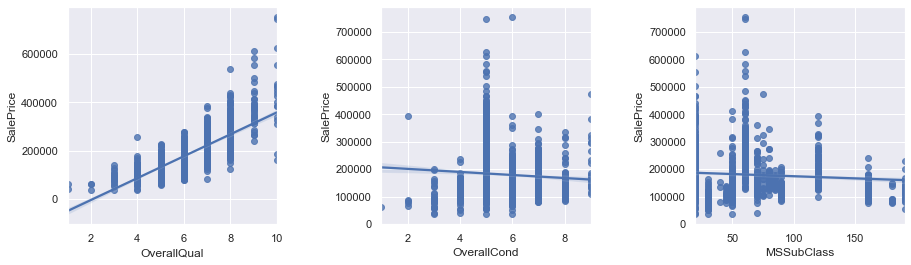

In [53]:
fig = plt.figure(figsize=(15, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.5)

cols = ["OverallQual", "OverallCond", "MSSubClass"]

for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    sns.regplot(train[cols[i]], train["SalePrice"],ax=ax)
plt.show()

In [54]:
#changing column type
for i in cols:
    train[i] = train[i].astype(str)
    test[i] = test[i].astype(str)

In [55]:
#check column type
for i in cols:
    print(train[i].dtypes)

object
object
object


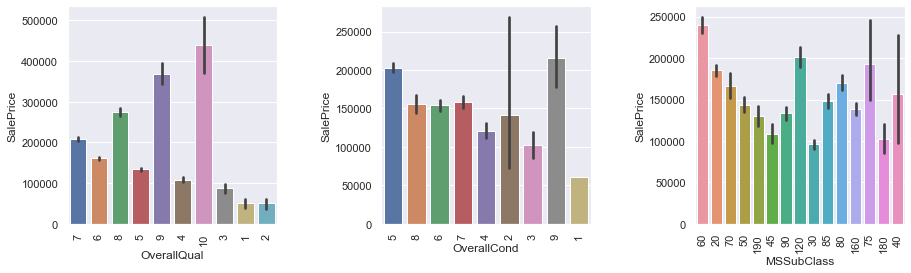

In [56]:
fig = plt.figure(figsize=(15, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.5)

for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    sns.barplot(train[cols[i]], train["SalePrice"],ax=ax)
    plt.xticks(rotation = 90)
plt.show()

##### Log Transform

We will look at the distribution of each numeric column based on its skew value and determine whether the column should be transformed to follow a normal distribution.

In [57]:
#make a dataframe
skew_df = pd.DataFrame(test.select_dtypes(np.number).columns,
                      columns = ["Numeric_Columns"])

#add skew value
skew_df["Skew"] = skew_df["Numeric_Columns"].apply(lambda i: st.skew(train[i]))

#check dataframe
skew_df

,Numeric_Columns,Skew
0,LotFrontage,2.382499
1,LotArea,12.195142
2,YearBuilt,-0.612831
3,YearRemodAdd,-0.503044
4,BsmtFinSF1,1.683771
5,BsmtFinSF2,4.250888
6,BsmtUnfSF,0.919323
7,TotalBsmtSF,1.522688
8,1stFlrSF,1.375342
9,2ndFlrSF,0.812194


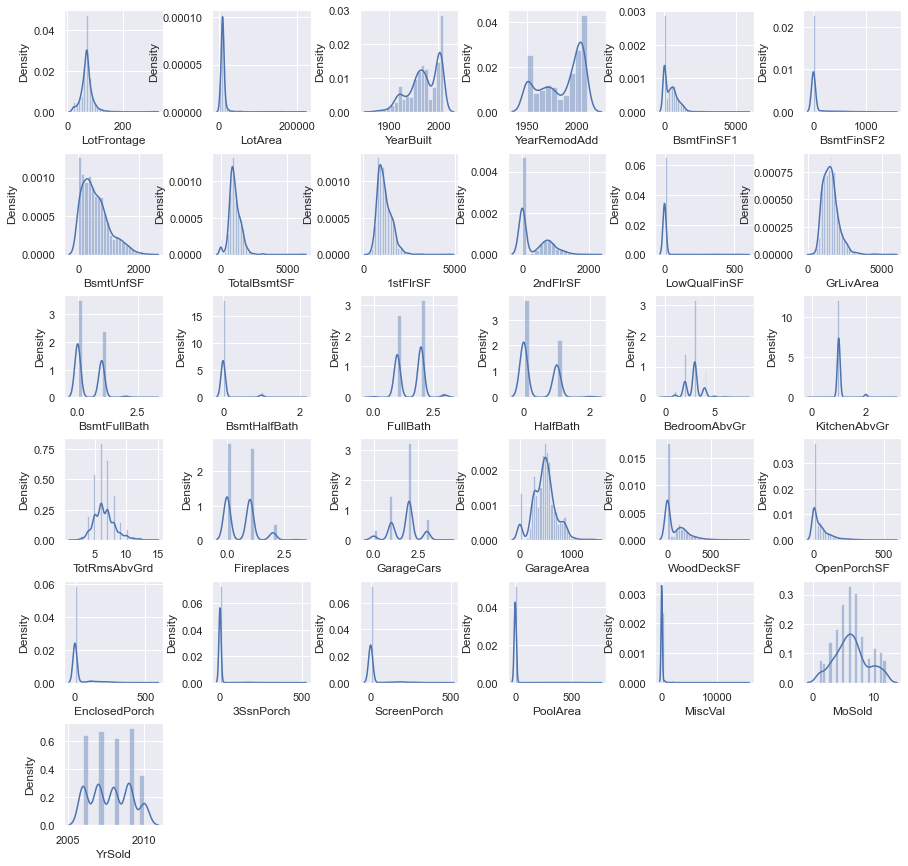

In [58]:
#Distribution of each numerical columns
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.5)

for i in range(len(skew_df["Numeric_Columns"])):
    ax = fig.add_subplot(6, 6, i+1)
    sns.distplot(train[skew_df["Numeric_Columns"][i]],ax=ax)
plt.show()

We can see based on the graph of the distribution of each column above, that because the column has a positive skew value, the graph is more skewed to the right and apply transformation if ABS(skew) >= 0.5

In [59]:
skew_df = skew_df[abs(skew_df["Skew"]) >= 0.5]
skew_df["Numeric_Columns"].values

array(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], dtype=object)

In [60]:
for col in skew_df["Numeric_Columns"].values:
    train[col] = np.log1p(train[col])

In [61]:
train["SalePrice"].head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

In [62]:
#check skew value again

#make a dataframe
skew_df = pd.DataFrame(train.select_dtypes(np.number).columns,
                      columns = ["Numeric_Columns"])

#add skew value
skew_df["Skew"] = skew_df["Numeric_Columns"].apply(lambda i: st.skew(train[i]))

#query
skew_df = skew_df[abs(skew_df["Skew"]) >= 0.5]
skew_df["Numeric_Columns"].values

array(['LotFrontage', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'LowQualFinSF', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'], dtype=object)

##### MoSold Column

In [63]:
train["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

We will transform with the cosine function into cyclic features, one of which is MoSold. Where we want the values ​​of month 1 and month 12 to be the same.

In [64]:
#cosine transform

train["MoSold"] = (-np.cos(0.5236 * train["MoSold"]))
train["MoSold"].head()

Id
1   -0.499998
2    0.866028
3   -0.000011
4   -0.499998
5   -1.000000
Name: MoSold, dtype: float64

##### Target Transformation

In [65]:
train["SalePrice"] = np.log(train["SalePrice"])
train["SalePrice"]

Id
1       12.247694
2       12.109011
3       12.317167
4       11.849398
5       12.429216
          ...    
1456    12.072541
1457    12.254863
1458    12.493130
1459    11.864462
1460    11.901583
Name: SalePrice, Length: 1460, dtype: float64

##### TEST Transformation

In [66]:
col = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [67]:
for i in col:
    test[i] = np.log1p(test[i])

In [68]:
#cosine transform

test["MoSold"] = (-np.cos(0.5236 * test["MoSold"]))
test["MoSold"].head()

Id
1461    1.000000
1462    1.000000
1463    0.000004
1464    1.000000
1465   -0.866025
Name: MoSold, dtype: float64

### DATA SPLITTING

Split train data into features data and target (SalePrice column) data

In [69]:
X = train.drop(columns = ["SalePrice"],
                     axis = 1)
y = train["SalePrice"]

In [70]:
X_train, X_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 test_size = 0.1,
                                                 random_state = 42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1314, 79), (146, 79), (1314,), (146,))

In [71]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,4.189655,9.042040,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,-0.499998,2008,WD,Normal
2,20,RL,4.394449,9.169623,Pave,None,Reg,Lvl,AllPub,FR2,...,0.0,0.0,None,None,None,0.0,0.866028,2007,WD,Normal
3,60,RL,4.234107,9.328212,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,-0.000011,2008,WD,Normal
4,70,RL,4.110874,9.164401,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,0.0,None,None,None,0.0,-0.499998,2006,WD,Abnorml
5,60,RL,4.442651,9.565284,Pave,None,IR1,Lvl,AllPub,FR2,...,0.0,0.0,None,None,None,0.0,-1.000000,2008,WD,Normal


In [72]:
y.head()

Id
1    12.247694
2    12.109011
3    12.317167
4    11.849398
5    12.429216
Name: SalePrice, dtype: float64

### PREPROCESSING

In [73]:
#create pipeline

#import packages
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

preprocessing is divided into two, namely preprocessing for the object or category column and preprocessing for the number column, then the two pipelines will be combined.

In [74]:
#numerical pipeline
num_pipelines = Pipeline([
    ('Standard Scaler', StandardScaler())
])

#categorical pipeline
cat_pipeline = Pipeline([
    ('Label Encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [75]:
#combining two pipelines

#define num_features and obj_features
obj_features = X[X.dtypes[X.dtypes == "object"].index].columns
num_features = X[X.dtypes[X.dtypes != "object"].index].columns
print("object features :")
print(obj_features)
print("numerical features :")
print(num_features)

#preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('Numerical', num_pipelines, num_features),
        ('Categorical', cat_pipeline, obj_features)  
    ],
    remainder = "drop"
)

object features :
Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')
numerical features :
Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',

In [76]:
#fitting preprocessing pipeline
X_train_prep = preprocessor.fit_transform(X_train)
X_val_prep =  preprocessor.transform(X_val)

#checking shape
print ('X_train_prep.shape' , X_train_prep.shape)
print ('X_eval_prep.shape' , X_val_prep.shape)

X_train_prep.shape (1314, 343)
X_eval_prep.shape (146, 343)


In [77]:
#fit test dataset
X_test =  preprocessor.transform(test)
print ('X_test.shape' , X_test.shape)

X_test.shape (1459, 343)


### MODELLING

#### BASIC MODEL

##### RandomForestRegressor

In [78]:
#model_1 = RandomForestRegressor

#model building and fitting
model_1 = RandomForestRegressor()
model_1.fit(X_train_prep, y_train)

#predicting validation data
model_1_pred = model_1.predict(X_val_prep)

#checking model accuracy score
print(np.sqrt(mean_squared_error(y_val, model_1_pred)))
print(r2_score(y_val, model_1_pred))

0.13420936767941874
0.9080881921122325


##### XGBRegressor

In [79]:
#model_2 = XGBRegressor

#model building and fitting
model_2 = XGBRegressor()
model_2.fit(X_train_prep, y_train)

#predicting validation data
model_2_pred = model_2.predict(X_val_prep)

#checking model accuracy score
print(np.sqrt(mean_squared_error(y_val, model_2_pred)))
print(r2_score(y_val, model_2_pred))

0.1442392244352393
0.8938371899758866


##### GradientBoostingRegressor

In [88]:
#model_3 = GradientBoostingRegressor

#model building and fitting
model_3 = GradientBoostingRegressor()
model_3.fit(X_train_prep, y_train)

#predicting validation data
model_3_pred = model_3.predict(X_val_prep)

#checking model accuracy score
print(np.sqrt(mean_squared_error(y_val, model_3_pred)))
print(r2_score(y_val, model_3_pred))

0.10890192814639102
0.9394830841783336


In [89]:
model_3.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### OPTIMIZED MODEL

In [107]:
#tuning GradientBoostingRegressor model

params_1 = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": st.loguniform(0.01, 1)
}

gbr = GradientBoostingRegressor()

random_search_1 = RandomizedSearchCV(estimator=gbr, 
                                   param_distributions=params_1, 
                                   scoring='neg_root_mean_squared_error',
                                   verbose = 10,
                                   cv = 10)
random_search_1.fit(X_train_prep, y_train)

print(random_search_1.best_estimator_)
print(random_search_1.best_params_)
print(random_search_1.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] learning_rate=0.08698732870229249, max_leaf_nodes=50, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.08698732870229249, max_leaf_nodes=50, n_estimators=200, score=-0.157, total=   1.5s
[CV] learning_rate=0.08698732870229249, max_leaf_nodes=50, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  learning_rate=0.08698732870229249, max_leaf_nodes=50, n_estimators=200, score=-0.094, total=   1.5s
[CV] learning_rate=0.08698732870229249, max_leaf_nodes=50, n_estimators=200 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV]  learning_rate=0.08698732870229249, max_leaf_nodes=50, n_estimators=200, score=-0.159, total=   1.5s
[CV] learning_rate=0.08698732870229249, max_leaf_nodes=50, n_estimators=200 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s remaining:    0.0s


[CV]  learning_rate=0.08698732870229249, max_leaf_nodes=50, n_estimators=200, score=-0.161, total=   1.5s
[CV] learning_rate=0.08698732870229249, max_leaf_nodes=50, n_estimators=200 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.9s remaining:    0.0s


[CV]  learning_rate=0.08698732870229249, max_leaf_nodes=50, n_estimators=200, score=-0.141, total=   1.5s
[CV] learning_rate=0.08698732870229249, max_leaf_nodes=50, n_estimators=200 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.3s remaining:    0.0s


[CV]  learning_rate=0.08698732870229249, max_leaf_nodes=50, n_estimators=200, score=-0.163, total=   1.4s
[CV] learning_rate=0.08698732870229249, max_leaf_nodes=50, n_estimators=200 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.7s remaining:    0.0s


[CV]  learning_rate=0.08698732870229249, max_leaf_nodes=50, n_estimators=200, score=-0.121, total=   1.5s
[CV] learning_rate=0.08698732870229249, max_leaf_nodes=50, n_estimators=200 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.2s remaining:    0.0s


[CV]  learning_rate=0.08698732870229249, max_leaf_nodes=50, n_estimators=200, score=-0.122, total=   1.4s
[CV] learning_rate=0.08698732870229249, max_leaf_nodes=50, n_estimators=200 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   11.6s remaining:    0.0s


[CV]  learning_rate=0.08698732870229249, max_leaf_nodes=50, n_estimators=200, score=-0.125, total=   1.5s
[CV] learning_rate=0.08698732870229249, max_leaf_nodes=50, n_estimators=200 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   13.1s remaining:    0.0s


[CV]  learning_rate=0.08698732870229249, max_leaf_nodes=50, n_estimators=200, score=-0.098, total=   1.5s
[CV] learning_rate=0.4942971004175545, max_leaf_nodes=100, n_estimators=10 
[CV]  learning_rate=0.4942971004175545, max_leaf_nodes=100, n_estimators=10, score=-0.177, total=   0.1s
[CV] learning_rate=0.4942971004175545, max_leaf_nodes=100, n_estimators=10 
[CV]  learning_rate=0.4942971004175545, max_leaf_nodes=100, n_estimators=10, score=-0.130, total=   0.1s
[CV] learning_rate=0.4942971004175545, max_leaf_nodes=100, n_estimators=10 
[CV]  learning_rate=0.4942971004175545, max_leaf_nodes=100, n_estimators=10, score=-0.178, total=   0.1s
[CV] learning_rate=0.4942971004175545, max_leaf_nodes=100, n_estimators=10 
[CV]  learning_rate=0.4942971004175545, max_leaf_nodes=100, n_estimators=10, score=-0.177, total=   0.1s
[CV] learning_rate=0.4942971004175545, max_leaf_nodes=100, n_estimators=10 
[CV]  learning_rate=0.4942971004175545, max_leaf_nodes=100, n_estimators=10, score=-0.161, tot

[CV]  learning_rate=0.017039246422620665, max_leaf_nodes=2, n_estimators=5, score=-0.342, total=   0.0s
[CV] learning_rate=0.017039246422620665, max_leaf_nodes=2, n_estimators=5 
[CV]  learning_rate=0.017039246422620665, max_leaf_nodes=2, n_estimators=5, score=-0.359, total=   0.0s
[CV] learning_rate=0.017039246422620665, max_leaf_nodes=2, n_estimators=5 
[CV]  learning_rate=0.017039246422620665, max_leaf_nodes=2, n_estimators=5, score=-0.362, total=   0.0s
[CV] learning_rate=0.058424660505209225, max_leaf_nodes=100, n_estimators=1000 
[CV]  learning_rate=0.058424660505209225, max_leaf_nodes=100, n_estimators=1000, score=-0.161, total=   7.1s
[CV] learning_rate=0.058424660505209225, max_leaf_nodes=100, n_estimators=1000 
[CV]  learning_rate=0.058424660505209225, max_leaf_nodes=100, n_estimators=1000, score=-0.100, total=   7.2s
[CV] learning_rate=0.058424660505209225, max_leaf_nodes=100, n_estimators=1000 
[CV]  learning_rate=0.058424660505209225, max_leaf_nodes=100, n_estimators=1000,

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.8min finished


GradientBoostingRegressor(learning_rate=0.058424660505209225,
                          max_leaf_nodes=100, n_estimators=1000)
{'learning_rate': 0.058424660505209225, 'max_leaf_nodes': 100, 'n_estimators': 1000}
-0.13270642952053077


In [109]:
#GradientBoostingRegressor

#predicting validation data
opt_model_1 = random_search_1.predict(X_val_prep)

#checking model accuracy score
print(np.sqrt(mean_squared_error(y_val, opt_model_1)))
print(r2_score(y_val, opt_model_1))

0.10773822297388479
0.9407695183356349


### SUBMISSION

In [101]:
prediction = random_search_1.predict(X_test)
prediction

array([11.74594374, 11.93485449, 12.15851363, ..., 11.85607637,
       11.72995287, 12.31934499])

In [103]:
sample_submission["SalePrice"] = np.exp(prediction)

In [104]:
sample_submission.to_csv('house-regression.csv',
                        index=False)